# Regularization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import os

In [9]:
n = 100
c = 0.001
x1 = np.random.normal(size=n)
x2 = x1 + c*np.random.normal(size=n)
x3 = x1 - x2 + c*np.random.normal(size=n)
y = x1 + x2 + x3 + np.random.normal(size=n)
X = np.stack((x1, x2, x3), axis=1)
print("cor(x1, x2_ = ", pearsonr(x1, x2)[0])
print("cor(x3, x1-x2) = ", pearsonr(x3, x1 - x2)[0])
print("condition number of training X", np.linalg.cond(X))

cor(x1, x2_ =  0.9999994973694513
cor(x3, x1-x2) =  0.6658722613399362
condition number of training X 2782.605129213563


In [10]:
m = LinearRegression().fit(X, y)
print("lm coefficients:", m.coef_)
# penalty value
alpha=.1  # sometimes refer to this as lambda
mr = Ridge(alpha=alpha).fit(X, y)
# large alpha = large penalty
print("ridge coefficients:", mr.coef_)
ml = Lasso(alpha=alpha).fit(X, y)
print("lasso coefficients", ml.coef_)


lm coefficients: [ 126.08226873 -124.13717949   64.5524808 ]
ridge coefficients: [1.04450831 0.87723678 0.22743519]
lasso coefficients [1.8106393 0.        0.       ]


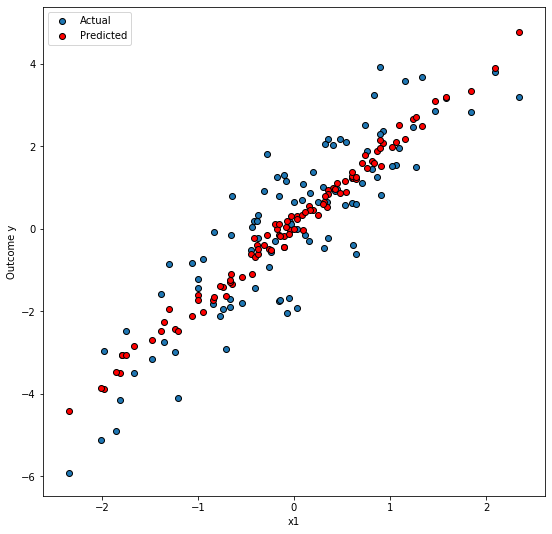

In [11]:
plt.figure(figsize=(9,9))
plt.scatter(x1, y, edgecolor='k', label='Actual')
hatY = m.predict(X)
plt.scatter(x1, hatY, c='r', edgecolor='k', label='Predicted')
plt.xlabel('x1')
plt.ylabel('Outcome y')
plt.legend()

## Create testing data

Normally you split validation data out of the original data, but as we created just random numbers, we can create some more instead.

In [12]:
nt = 1000
c = 0.001
x1t = np.random.normal(size=nt)
x2t = x1t + c*np.random.normal(size=nt)
x3t = x1t - x2t + c*np.random.normal(size=nt)
yt = x1t + x2t + x3t + np.random.normal(size=nt)
Xt = np.stack((x1t, x2t, x3t), axis=1)
print("condition number of validation X", np.linalg.cond(X))

condition number of validation X 2782.605129213563


## ... and test

In [13]:
yhat = m.predict(Xt)
rmse = np.sqrt(np.mean(yt - yhat)**2)
print("lm:", rmse)
yhatr = mr.predict(Xt)
rmser = np.sqrt(np.mean(yt - yhatr)**2)
print("ridge:", rmser)
yhatl = ml.predict(Xt)
rmsel = np.sqrt(np.mean(yt - yhatl)**2)
print("lasso:", rmsel)


lm: 0.08682414755474402
ridge: 0.11891310050321922
lasso: 0.11274663408823926


RMSE = 4.229196099438271


/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73355e-23): result may not be accurate.
  overwrite_a=True).T


Text(0, 0.5, 'predicted MEDV')

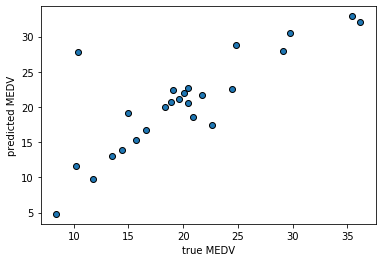

In [29]:
alpha=1e-6
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 4.665171062621945


Text(0, 0.5, 'predicted MEDV')

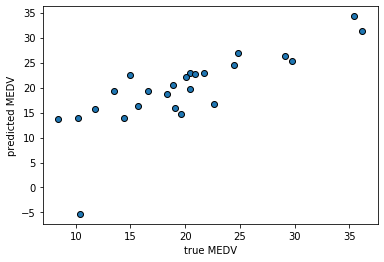

In [28]:
alpha=1e6
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

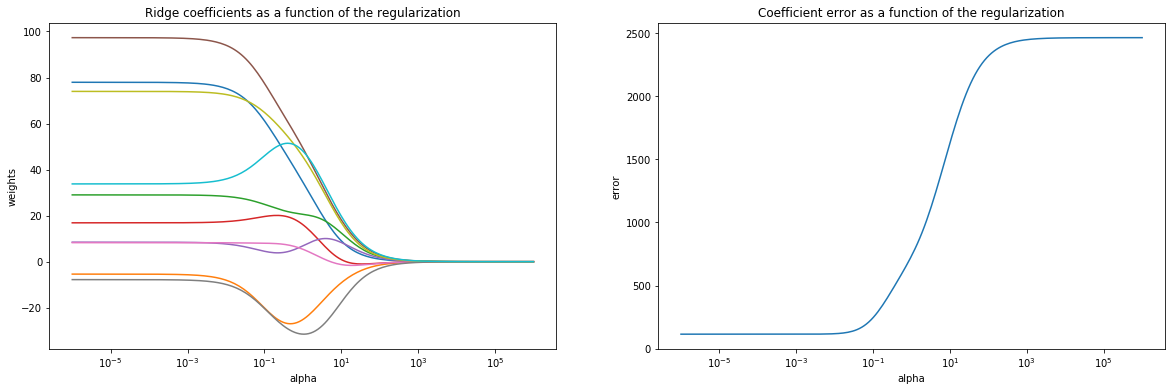

In [35]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

## Exercise:

1. compute the rmse-s at different lambda values.  Use a wide range of lambdas, say b/w 1e-6 to 1e6.

2. make a plot where you show how rmse depends on $\lambda$.  Note: use log scale for lambda

3. make another plot where you show how coefficients depend on $\lambda$


## Use real data

We read Boston data, but as that contains only 13 variables and causes little overfitting.  We add more variables and cut down the number of observations by taking a sample.

### First, work with unmodified Boston data

In [19]:
# Where are we?
print(os.getcwd())
boston = pd.read_csv("boston.csv.bz2", sep="\t")
print(boston.shape)
print(boston.sample(4))  # just a sanity check
X = boston.drop('medv', axis=1).values
y = boston.medv.values
print("Condition number of X", np.linalg.cond(X))

/Users/iguest/Downloads
(506, 14)
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
230  0.53700  0.0   6.20     0  0.504  5.981  68.1  3.6715    8  307     17.4   
485  3.67367  0.0  18.10     0  0.583  6.312  51.9  3.9917   24  666     20.2   
27   0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307     21.0   
163  1.51902  0.0  19.58     1  0.605  8.375  93.9  2.1620    5  403     14.7   

      black  lstat  medv  
230  378.35  11.65  24.3  
485  388.62  10.58  21.2  
27   306.38  17.28  14.8  
163  388.45   3.32  50.0  
Condition number of X 8497.93630384575


Now just do test-train split and see if we have any overfitting

RMSE on training = 4.528472030971533
RMSE on validation = 5.347772807598737


Text(0, 0.5, 'predicted MEDV')

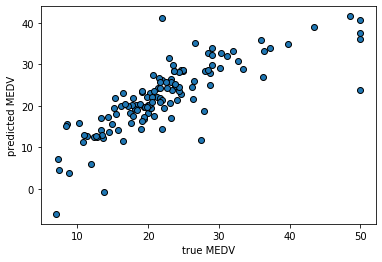

In [20]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
m = LinearRegression().fit(Xtrain, ytrain)
## RMSE on training
yhat = m.predict(Xtrain)
rmse = np.sqrt(np.mean((ytrain - yhat)**2))
print("RMSE on training =", rmse)
## RMSE on validation
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE on validation =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

As one can see, OLS works well and we don't see overfitting here.  The sample size is large enough (506) and we don't have many features (13)

### Next, add more collinear features

Create a large number of somewhat collinear features.  Check condition number to see how troublesome is the result

In [21]:
boston1 = pd.concat((
boston, boston.rm**2, boston.rm**3, boston.rm**4, boston.rm**5, boston.rm**6,
boston.crim**2, boston.crim**2, boston.zn**3, boston.zn**4,
boston.indus**2, boston.indus**3, boston.indus**4,
boston.crim*boston.indus, boston.crim*boston.zn, boston.crim*boston.chas,
boston.rm*boston.age, boston.rm*boston.age**2), axis=1)
boston1 = boston1.sample(100)
X = boston1.drop('medv', axis=1).values
y = boston1.medv.values
print("Condition number of X", np.linalg.cond(X))
print(boston1.head())
print("dim of extended Boston data", boston1.shape)


Condition number of X 2.0478339003502104e+20
        crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ...  \
141  1.62864   0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437  ...   
290  0.03502  80.0   4.95     0  0.411  6.861   27.9  5.1167    4  245  ...   
402  9.59571   0.0  18.10     0  0.693  6.404  100.0  1.6390   24  666  ...   
87   0.07151   0.0   4.49     0  0.449  6.121   56.8  3.7476    3  247  ...   
31   1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307  ...   

           zn          zn     indus         indus          indus           0  \
141       0.0         0.0  479.1721  10489.077269  229605.901418   35.650930   
290  512000.0  40960000.0   24.5025    121.287375     600.372506    0.173349   
402       0.0         0.0  327.6100   5929.741000  107328.312100  173.682351   
87        0.0         0.0   20.1601     90.518849     406.429632    0.321080   
31        0.0         0.0   66.2596    539.353144    4390.334592   11.027421   


Now the condition number is enourmous and the formula may fail.  But when it works, you may see enormous effects.

However, sklearn implements a more robust algorithm that overfits substantially less than the standard linear regression.

Pure linear regression coefficients:
 [-1.37050049e+07 -3.11833338e+05  9.29050953e+06 -3.50630077e+08
 -1.13583711e+09 -5.07334401e+11  2.69366203e+06  2.26612481e+06
  2.17062719e+07 -6.00778756e+05  2.19614121e+07 -6.53035838e+04
 -1.02068446e+07  3.90481392e+11 -1.19453033e+11  1.81563910e+10
 -1.37122599e+09  4.11653807e+07  5.93750972e+10 -5.93754616e+10
 -2.86690320e-06  7.33596047e-08  1.32429429e-01 -5.86339365e-03
  8.48816313e-05  9.07082217e-02  4.48250189e-01 -2.10491027e+00
 -5.46186999e-02 -9.40041024e-05]
sklearn estimated coefficients:
 [-2.57486143e+00 -6.32442721e-02 -1.19579982e+00  8.07989856e-01
 -1.01415100e+01 -5.01497315e+04  3.79432316e-01 -8.07306673e-01
  1.22982903e-01 -9.00810989e-03 -5.70048116e-01  6.00600129e-03
 -4.16888578e-01  1.93797231e+04 -3.97545501e+03  4.56536819e+02
 -2.78256918e+01  7.03244618e-01  1.80621662e-03  1.77777191e-03
 -1.28331983e-07  5.07529341e-08  1.46485201e-01 -6.87431244e-03
  1.06414957e-04  1.26921337e-01  4.44074147e-01 -

Text(0, 0.5, 'predicted MEDV')

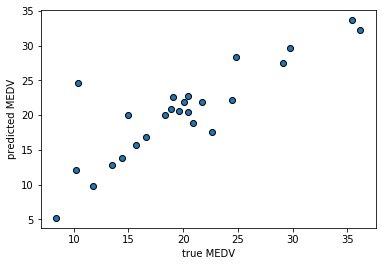

In [22]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
## try linear regression formula
beta = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
print("Pure linear regression coefficients:\n", beta)
## 
m = LinearRegression().fit(Xtrain, ytrain)
print("sklearn estimated coefficients:\n", m.coef_)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

### Use Ridge, Lasso

Ridge and lasso are designed for such cases and avoid overfitting (if the penalty parameter $\lambda$ (called `alpha` for Ridge() and Lasso()) is large enough.

RMSE = 3.251370754402586


Text(0, 0.5, 'predicted MEDV')

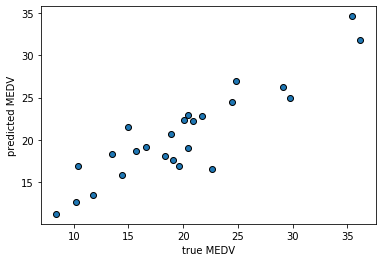

In [23]:
alpha=10000
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 5.0339465607345195


Text(0, 0.5, 'predicted MEDV')

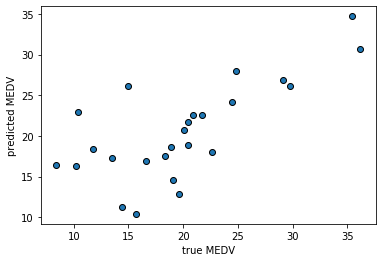

In [24]:
alpha=2000
m = Lasso(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

## Exercise

* Start with small alpha (0) and increase it to a large number (1e+9 or so).
* Run both Ridge and Lasso regressions.
* At each step record RMSE, the corresponding coefficients.
* make a plot that shows how RMSE depends on $\lambda$.
* make another plot of where the coefficient value depends on alpha (see James et al, Figure 6.4 and 6.6)

Hint: use `model.coef_` to extract coefficients from the fitted model.
You can compute RMSE in the same way as done in the example.

RMSE = 7.391986411723923


Text(0, 0.5, 'predicted MEDV')

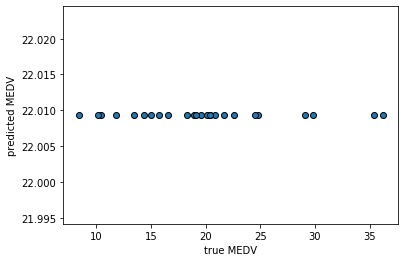

In [31]:
alpha= 1e+9
m = Lasso(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 4.94403657982446


Text(0, 0.5, 'predicted MEDV')

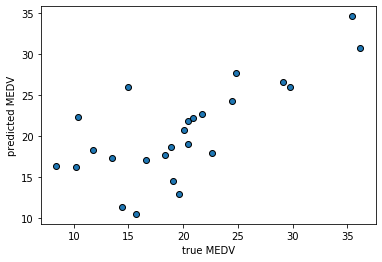

In [32]:
alpha=1e+9
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 7.391986411723923


Text(0, 0.5, 'predicted MEDV')

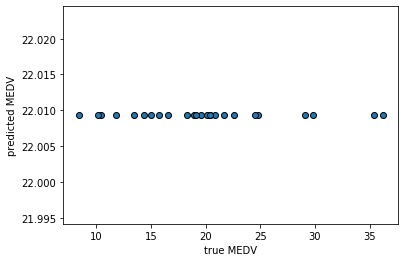

In [33]:
alpha=1e+12
m = Lasso(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 6.064734224561719


Text(0, 0.5, 'predicted MEDV')

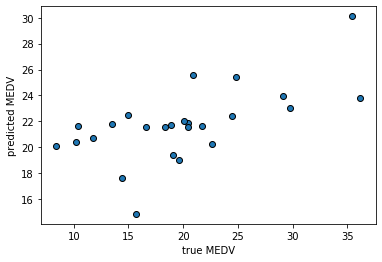

In [34]:
alpha=1e+12
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

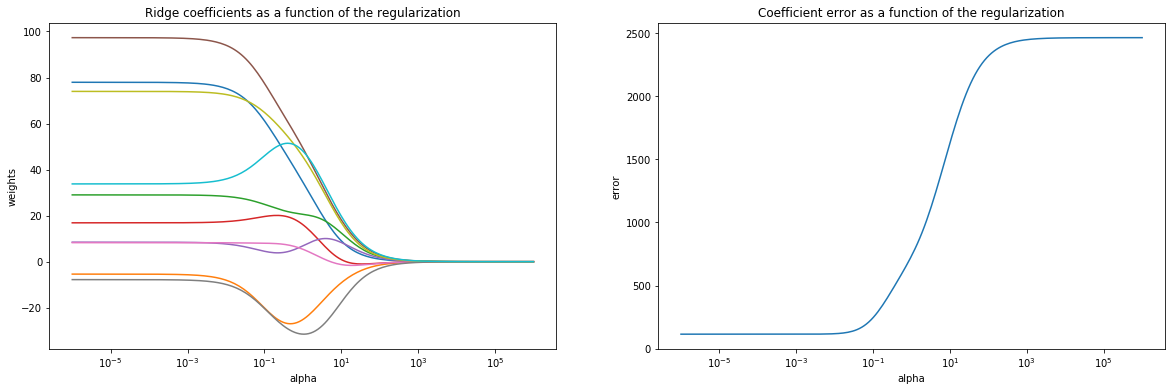

In [36]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()